# Occurrence frequencies of IVT object for ERA5 over regional ICON domain (1984-2013)


In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.utils import * 
from src.Corrections import * 
from src.Enumerations import Month, Season
from src.xarray_util import create_obj_from_dict,  ObjectContainer
from src.plot_funcs import plot_unstructured_rotated_grid


/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:22: AccessorRegistrationWarning: registration of accessor <class 'src.xarray_util.Accessor'> under name 'get' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("get")


ImportError: cannot import name 'plot_unstructured_rotated_grid' from 'src.plot_funcs' (/work/aa0238/a271093/Scripts/MOAAP/src/plot_funcs.py)

## Settings

In [5]:
input_path = '/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/'
type_='IVT'
input_file_name_temp = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
#input_field_grid= '/work/aa0238/a271093/data/input/IVT_85_percentiles_CNMR_control_3dx3dy.nc'
#GridPoint.input_field_grid = input_field_grid

first_year = 1998
last_year = 2022
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [6]:
# create datetime lists
start_date_list, end_date_list = create_datetime_lists(first_year,last_year, months=6, correct_last_endtime=False) 
first_processed_date = start_date_list[0]
last_processed_date = end_date_list[-1]



# create and append Tracking objects to list (including Tracking object coordinates)
IVT_objs= ObjectContainer([])

for start_date, end_date in zip(start_date_list, end_date_list):
    print(start_date)
    pickle_file_path = f'{input_path}{type_}_{input_file_name_temp}_{get_datetime_str(start_date)}-{get_datetime_str(end_date)}_corrected'
    
    dict_ = load_pkl(pickle_file_path)
    

    for object_id in dict_.keys():
        try:
            ds = create_obj_from_dict(dict_,
                                      object_id,
                                      load_coordinates=True
                                  
                                     )
        except ValueError as ex:
            continue
        
        IVT_objs.append(ds)  
    
    

1984-01-01 00:00:00
1984-07-01 00:00:00
1985-01-01 00:00:00
1985-07-01 00:00:00
1986-01-01 00:00:00
1986-07-01 00:00:00
1987-01-01 00:00:00
1987-07-01 00:00:00
1988-01-01 00:00:00
1988-07-01 00:00:00
1989-01-01 00:00:00
1989-07-01 00:00:00
1990-01-01 00:00:00
1990-07-01 00:00:00
1991-01-01 00:00:00
1991-07-01 00:00:00
1992-01-01 00:00:00
1992-07-01 00:00:00
1993-01-01 00:00:00
1993-07-01 00:00:00
1994-01-01 00:00:00
1994-07-01 00:00:00
1995-01-01 00:00:00
1995-07-01 00:00:00
1996-01-01 00:00:00
1996-07-01 00:00:00
1997-01-01 00:00:00
1997-07-01 00:00:00
1998-01-01 00:00:00
1998-07-01 00:00:00
1999-01-01 00:00:00
1999-07-01 00:00:00
2000-01-01 00:00:00
2000-07-01 00:00:00
2001-01-01 00:00:00
2001-07-01 00:00:00
2002-01-01 00:00:00
2002-07-01 00:00:00
2003-01-01 00:00:00
2003-07-01 00:00:00
2004-01-01 00:00:00
2004-07-01 00:00:00
2005-01-01 00:00:00
2005-07-01 00:00:00
2006-01-01 00:00:00
2006-07-01 00:00:00
2007-01-01 00:00:00
2007-07-01 00:00:00
2008-01-01 00:00:00
2008-07-01 00:00:00


In [28]:
IVT_objs[0]

<xarray.Dataset> Size: 1kB
Dimensions:          (times: 20)
Coordinates:
  * times            (times) datetime64[ns] 160B 1984-01-01T01:00:00 ... 1984...
Data variables:
    id_              <U5 20B '50001'
    size             (times) float64 160B 3.884e+05 3.798e+05 ... 3.306e+03
    total_IVT        (times) float32 80B 4.21e+04 4.082e+04 ... 1.219e+03 301.8
    mean_IVT         (times) float32 80B 119.3 118.3 117.8 ... 103.0 101.5 100.6
    max_IVT          (times) float32 80B 162.1 156.2 152.4 ... 105.7 103.1 101.1
    min_IVT          (times) float32 80B 100.4 100.3 100.0 ... 100.1 100.0 100.3
    mass_center_idy  (times) float64 160B 14.33 13.76 13.48 ... 12.75 12.33
    mass_center_idx  (times) float64 160B 23.38 24.03 23.98 ... 43.33 45.33
    speed            (times) float64 160B nan 28.46 9.078 ... 55.09 61.96 66.55
    gridpoints       (times) object 160B [RotatedGridPoint(lat=4.300000190734...

# Plot number of days per season where a grid cell is part of an IVT object

Season.DJF
Season.MAM
Season.JJA
Season.SON


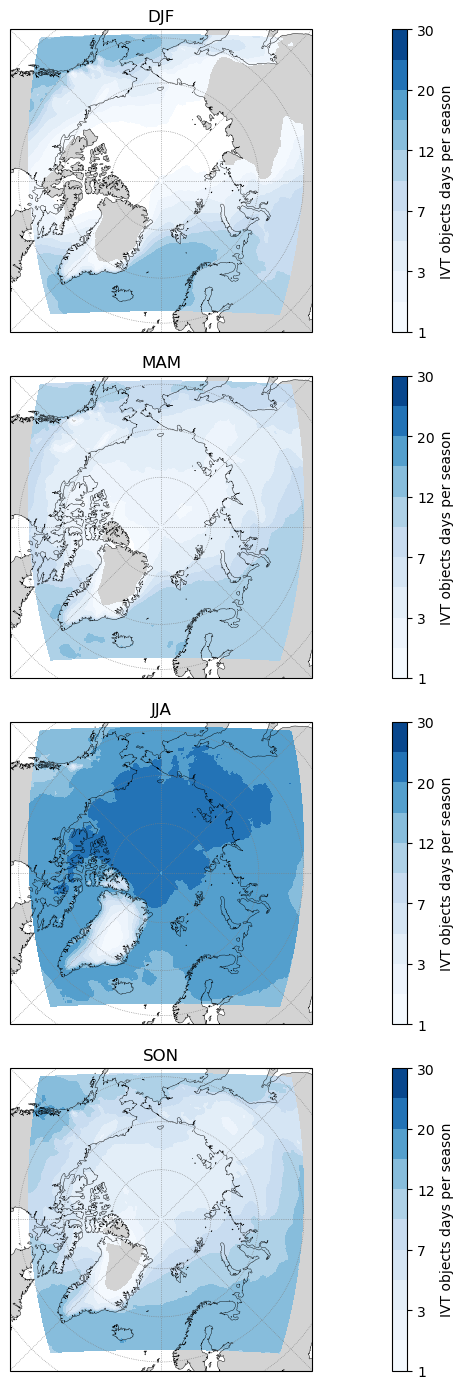

In [7]:
fig = plt.figure(figsize=(80,14))

for i, season_ in enumerate(Season):
    print (season_)
    IVTobjs_sel = IVT_objs.sel_season(season_)

    lon,lat,z = count_objs_grid_points(IVTobjs_sel)
    
    # normalize grid point counts to counts per season
    z= z/num_years
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i,
                                  title=season_.name,
                                  cbar_label = "IVT objects days per season")
    
plt.tight_layout()
